<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Diabetes_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [88]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [89]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [90]:
# data_orig = pd.read_csv(path_to_data + "Diabetes_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data + "Diabetes_SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data + "Diabetes_SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data + "Diabetes_Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data + "Diabetes_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data + "Diabetes_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data + "Diabetes_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)


data_orig = pd.read_csv(path_to_data2 + "Diabetes_Imbalanced_Fine_Tuning_5_20.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2 + "Diabetes_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2 + "Diabetes_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2 + "Diabetes_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2 + "Diabetes_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2 + "Diabetes_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2 + "Diabetes_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)


# data_orig

Original (imbalanced) data performance:

In [91]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.000000,0.997831
1,1,0.000878,0.997831
2,2,0.000000,0.997831
3,3,0.000878,0.997831
4,4,0.000878,0.995662
...,...,...,...
95,95,0.002195,0.995662
96,96,0.005707,0.976139
97,97,0.000439,0.997831
98,98,0.000439,1.000000


Error type: FPR
Mean: 0.0016593503072870471
Variance: 2.8597394168443764e-06
Variance of estimate: 2.8597394168443766e-08
Standard error: 0.00016910764077487383
95% Confidence Interval:  [ 0.0013278993313682944 ,  0.0019908012832058 ]
-----------------------------
Error type: FNR
Mean: 0.9934490238611713
Variance: 5.0569452934395125e-05
Variance of estimate: 5.056945293439512e-07
Standard error: 0.0007111220214168249
95% Confidence Interval:  [ 0.9920552246991943 ,  0.9948428230231483 ]
-----------------------------


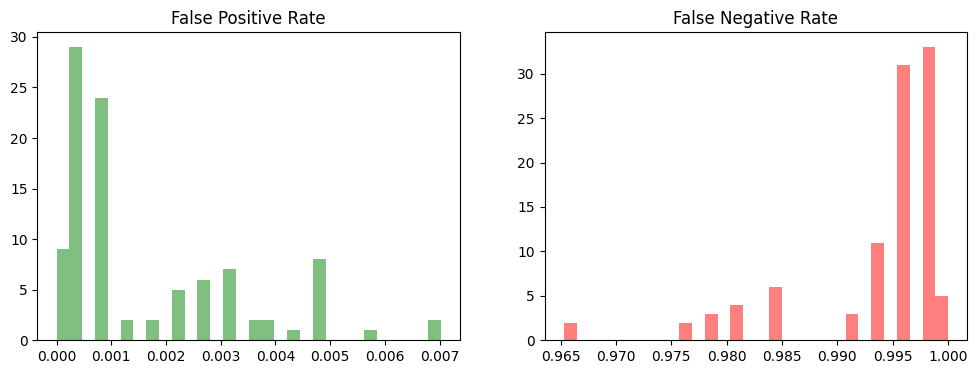

In [92]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.1999582967490781
Variance: 0.0024788539918880795
Variance of estimate: 1.2394269959440397e-05
Standard error: 0.003520549667231013
95% Confidence Interval:  [ 0.19305801940130532 ,  0.2068585740968509 ]
-----------------------------
Error type: FNR
Mean: 0.5168221258013667
Variance: 0.0065864491925425915
Variance of estimate: 3.2932245962712954e-05
Standard error: 0.00573866238445101
95% Confidence Interval:  [ 0.5055743475278427 ,  0.5280699040748906 ]
-----------------------------


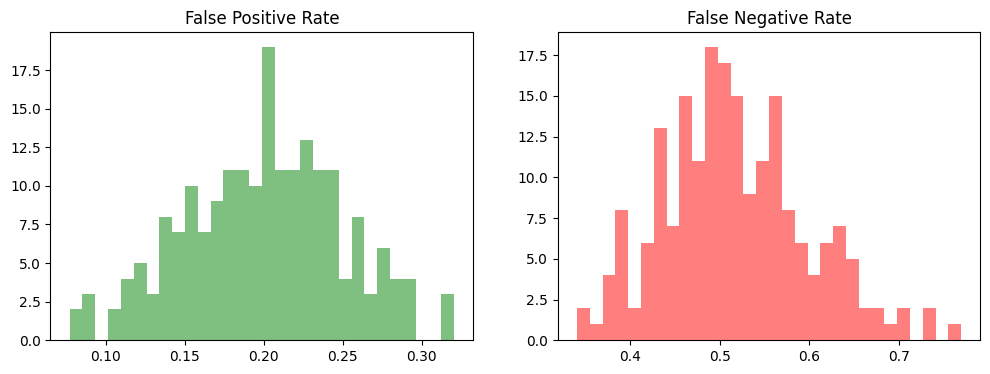

In [94]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.1927897278295478
Variance: 0.0027440127929891267
Variance of estimate: 1.3720063964945634e-05
Standard error: 0.003704060469936423
95% Confidence Interval:  [ 0.18552976930847243 ,  0.2000496863506232 ]
-----------------------------
Error type: FNR
Mean: 0.5549349240690781
Variance: 0.008488924620545315
Variance of estimate: 4.244462310272658e-05
Standard error: 0.006514953806645645
95% Confidence Interval:  [ 0.5421656146080526 ,  0.5677042335301036 ]
-----------------------------


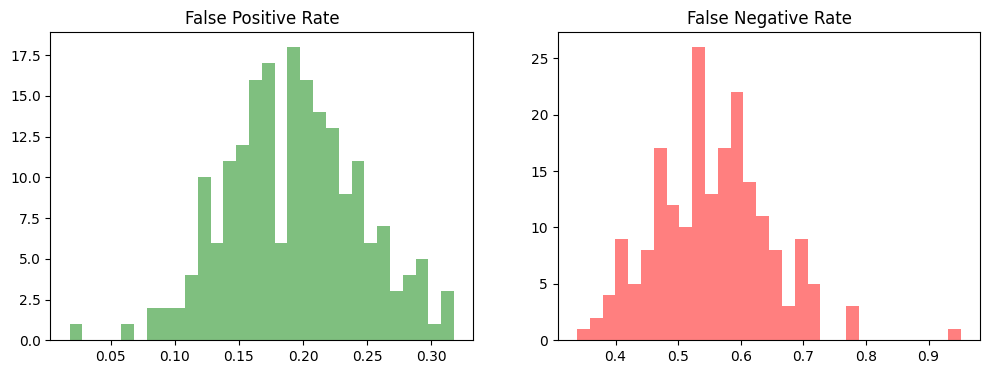

In [96]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.19181079894280068
Variance: 0.0019776359412422622
Variance of estimate: 9.888179706211311e-06
Standard error: 0.003144547615510268
95% Confidence Interval:  [ 0.18564748561640054 ,  0.1979741122692008 ]
-----------------------------
Error type: FNR
Mean: 0.5374078090973969
Variance: 0.007037318026404858
Variance of estimate: 3.5186590132024293e-05
Standard error: 0.0059318285656300195
95% Confidence Interval:  [ 0.5257814251087621 ,  0.5490341930860317 ]
-----------------------------


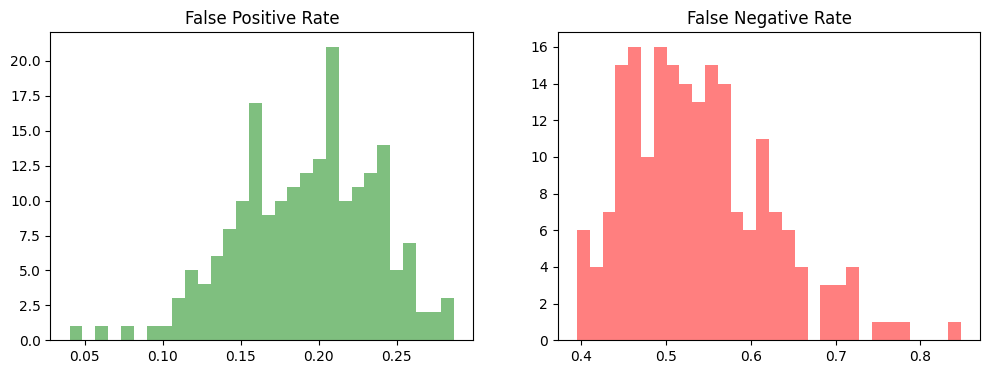

In [97]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.1896136962342932
Variance: 0.002994951647903014
Variance of estimate: 1.4974758239515069e-05
Standard error: 0.0038697232768655524
95% Confidence Interval:  [ 0.18202903861163672 ,  0.19719835385694967 ]
-----------------------------
Error type: FNR
Mean: 0.5561930585669089
Variance: 0.009679591937623954
Variance of estimate: 4.839795968811977e-05
Standard error: 0.00695686421371869
95% Confidence Interval:  [ 0.5425576047080203 ,  0.5698285124257976 ]
-----------------------------


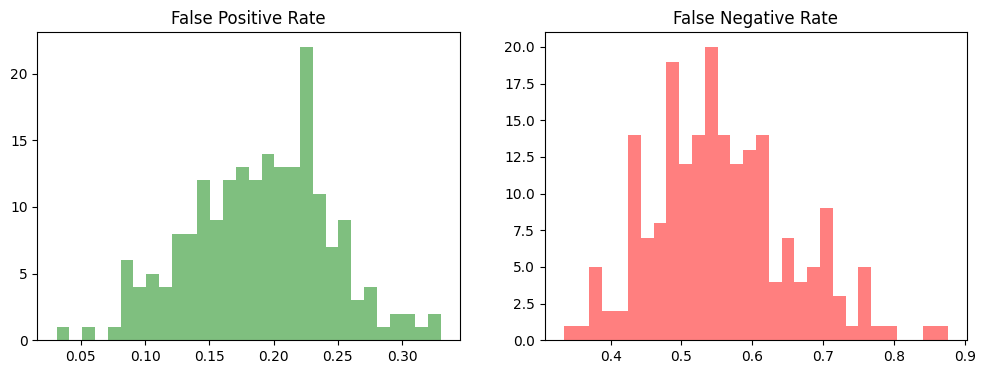

In [98]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.18227611939663738
Variance: 0.0024123145519958722
Variance of estimate: 1.2061572759979361e-05
Standard error: 0.003472977506402735
95% Confidence Interval:  [ 0.17546908348408802 ,  0.18908315530918673 ]
-----------------------------
Error type: FNR
Mean: 0.5688394793925814
Variance: 0.008393848706210226
Variance of estimate: 4.196924353105113e-05
Standard error: 0.006478367350733603
95% Confidence Interval:  [ 0.5561418793851435 ,  0.5815370794000193 ]
-----------------------------


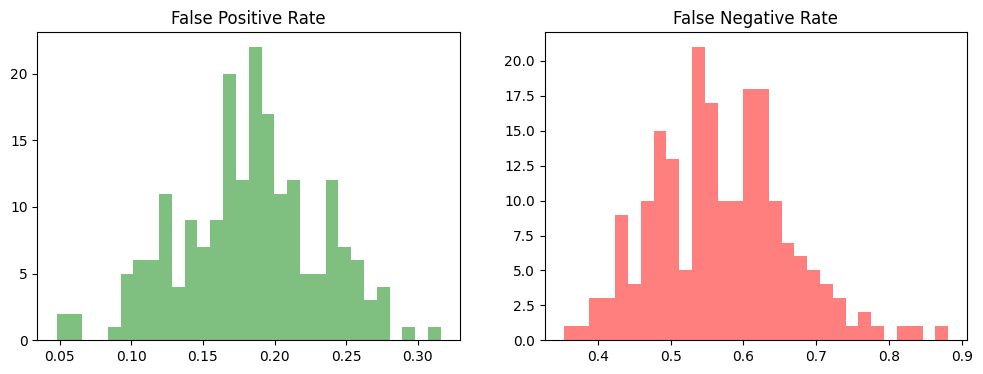

In [99]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.1748924495235996
Variance: 0.0021436155976441618
Variance of estimate: 1.0718077988220809e-05
Standard error: 0.0032738475817027293
95% Confidence Interval:  [ 0.16847570826346225 ,  0.18130919078373697 ]
-----------------------------
Error type: FNR
Mean: 0.5806399132354122
Variance: 0.008470788664257432
Variance of estimate: 4.235394332128716e-05
Standard error: 0.006507990728426644
95% Confidence Interval:  [ 0.5678842514076959 ,  0.5933955750631285 ]
-----------------------------


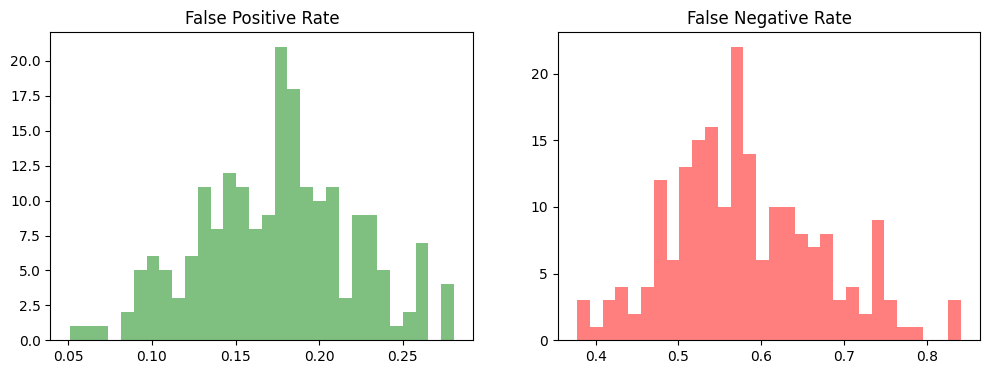

In [100]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [108]:
FPR = pd.DataFrame()

DF = FPR

DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = pd.Series(orig_FPR)
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.141352,0.111501,0.205882,0.200615,0.237050,0.127305,0.000000
1,0.157594,0.119403,0.258121,0.211589,0.185250,0.130817,0.000878
2,0.224759,0.111062,0.064969,0.150571,0.153205,0.224320,0.000000
3,0.185250,0.155838,0.158472,0.256804,0.167252,0.231343,0.000878
4,0.159350,0.193591,0.215101,0.228270,0.174276,0.190957,0.000878
...,...,...,...,...,...,...,...
195,0.217296,0.266462,0.211589,0.227831,0.143986,0.176910,NaN
196,0.205882,0.288850,0.172959,0.127305,0.130378,0.183933,NaN
197,0.295874,0.209833,0.219052,0.231782,0.188323,0.092186,NaN
198,0.163740,0.317823,0.144425,0.164179,0.100966,0.210272,NaN


<Axes: title={'center': 'FPR'}>

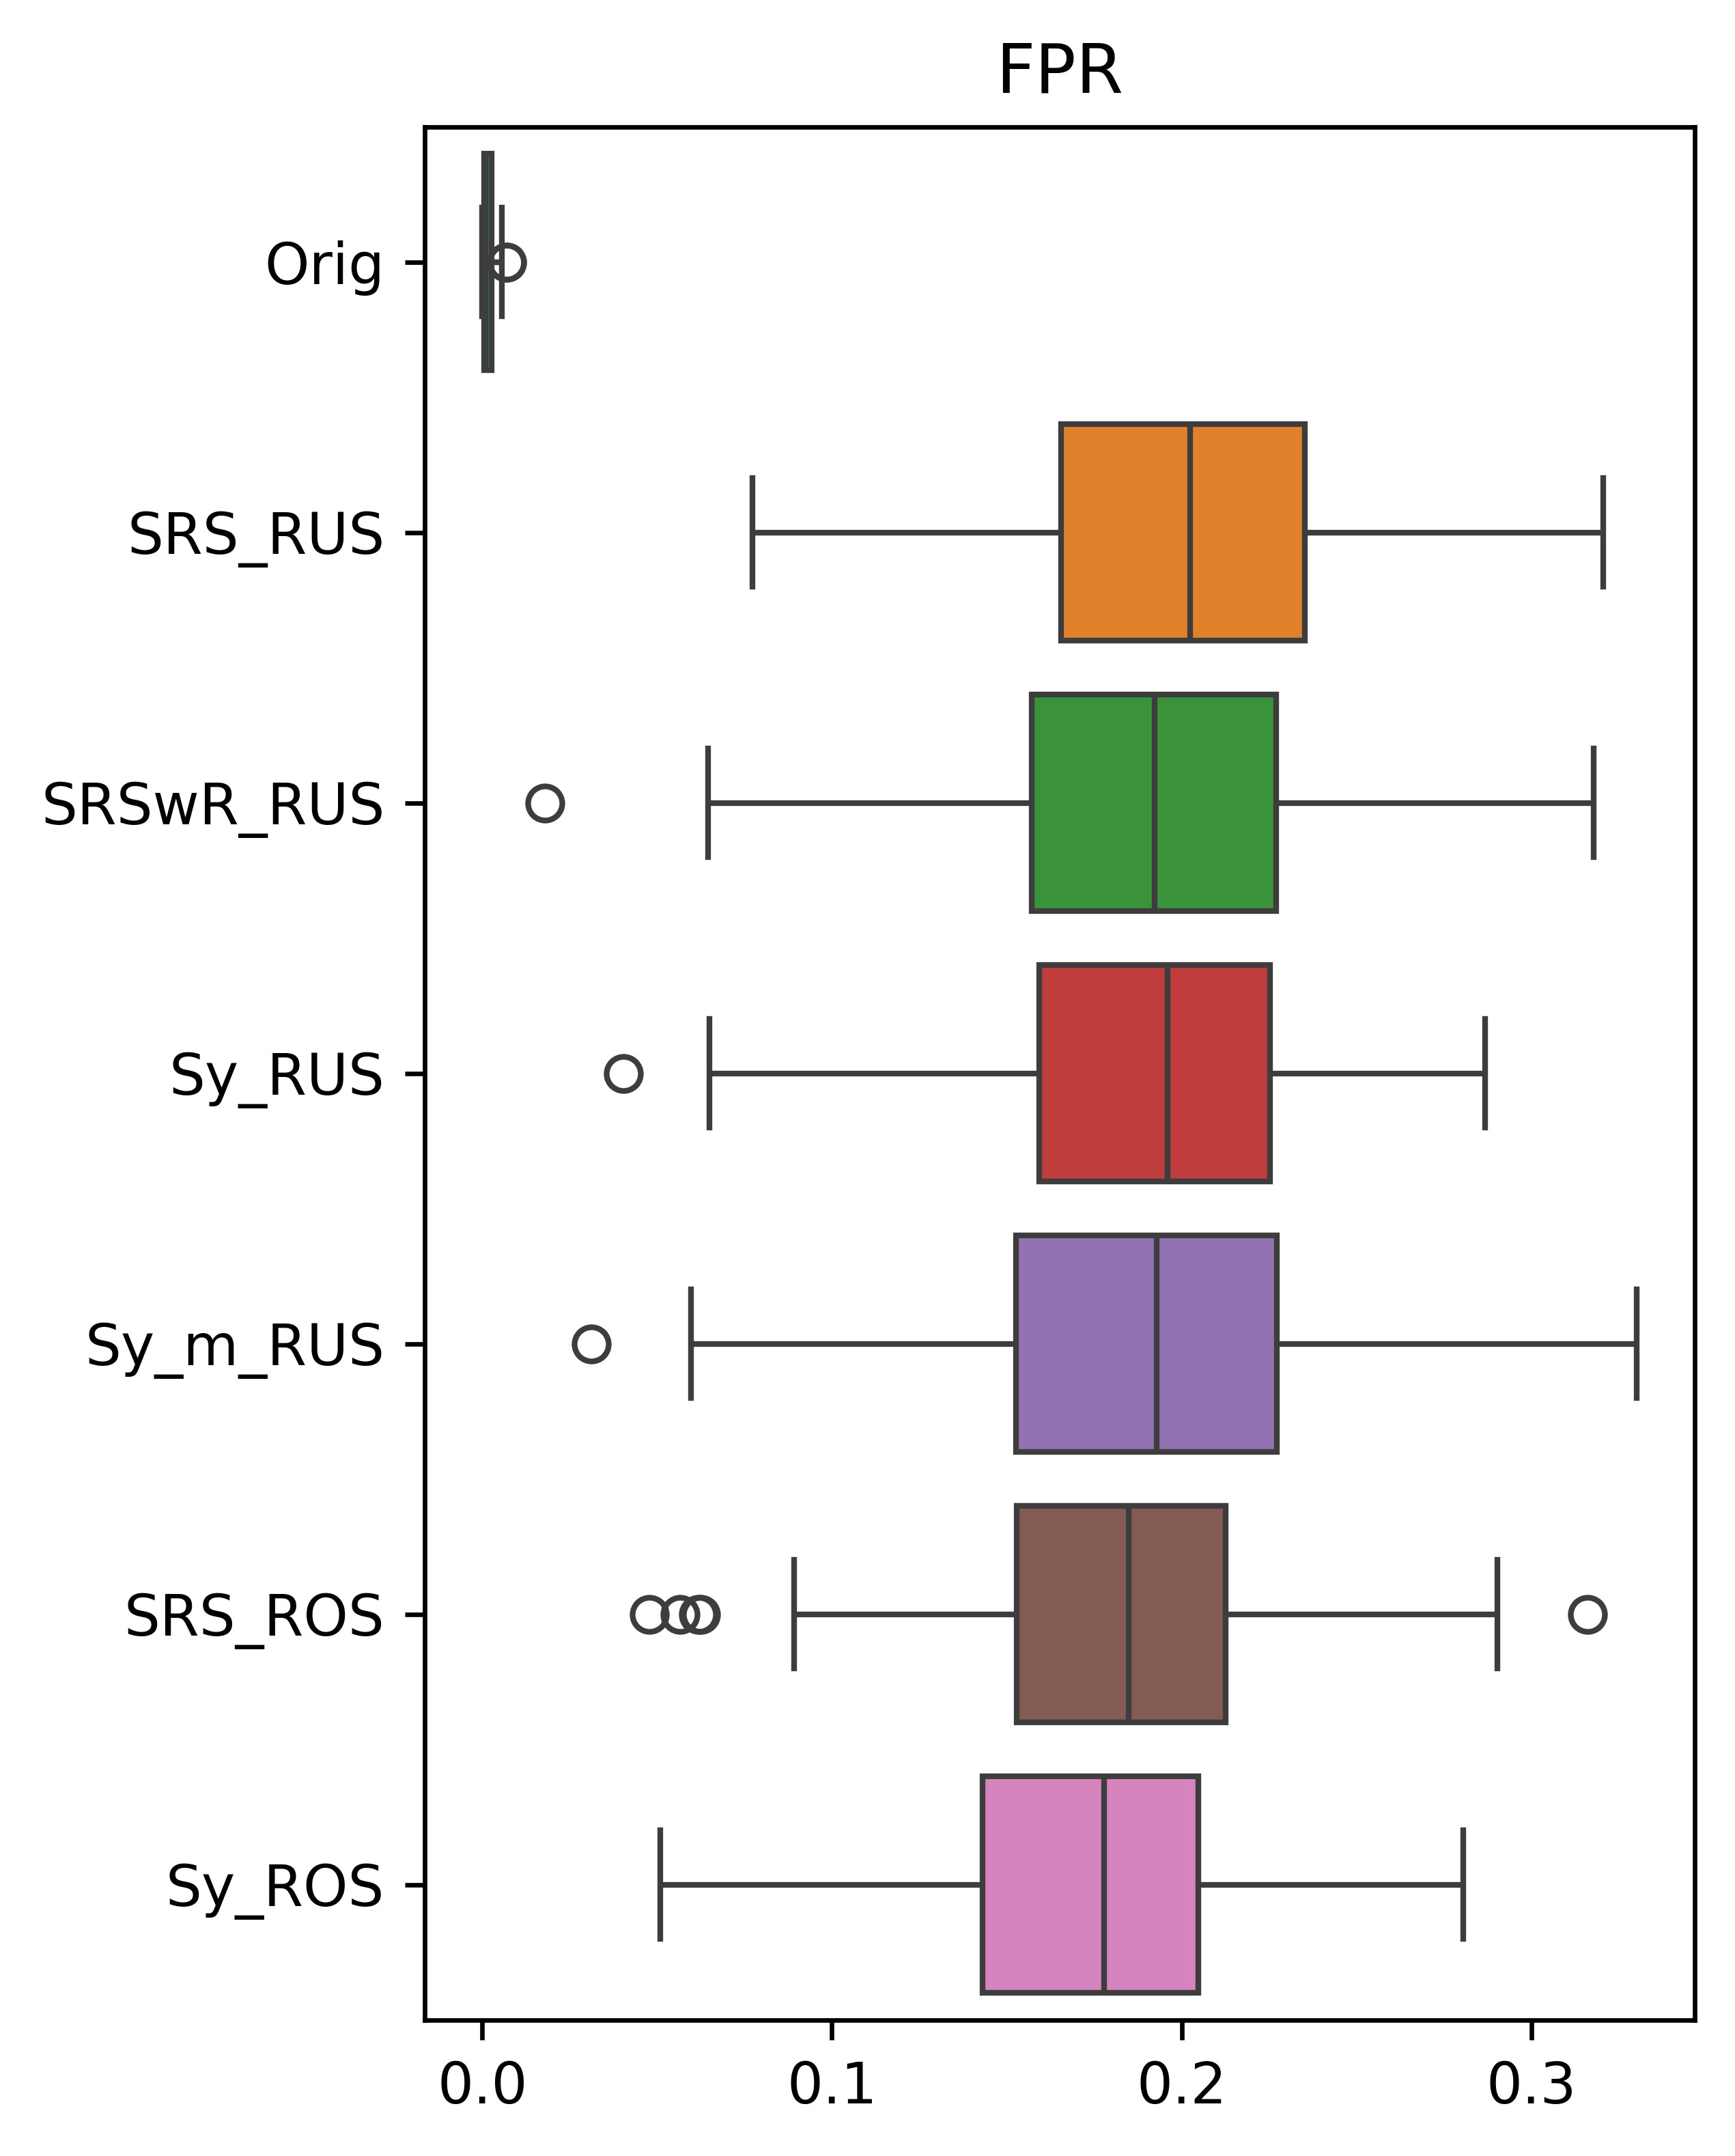

In [109]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [106]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.596529,0.722343,0.516269,0.511931,0.509761,0.668113,0.997831
1,0.557484,0.700651,0.446855,0.485900,0.583514,0.672451,0.997831
2,0.442516,0.715835,0.776573,0.590022,0.639913,0.516269,0.997831
3,0.518438,0.629067,0.596529,0.449024,0.603037,0.507592,0.997831
4,0.561822,0.579176,0.501085,0.466377,0.600868,0.563991,0.995662
...,...,...,...,...,...,...,...
195,0.485900,0.444685,0.481562,0.483731,0.624729,0.557484,NaN
196,0.501085,0.407809,0.546638,0.672451,0.648590,0.533623,NaN
197,0.388286,0.524946,0.466377,0.481562,0.548807,0.744035,NaN
198,0.566161,0.360087,0.613883,0.603037,0.728850,0.472885,NaN


<Axes: title={'center': 'FNR'}>

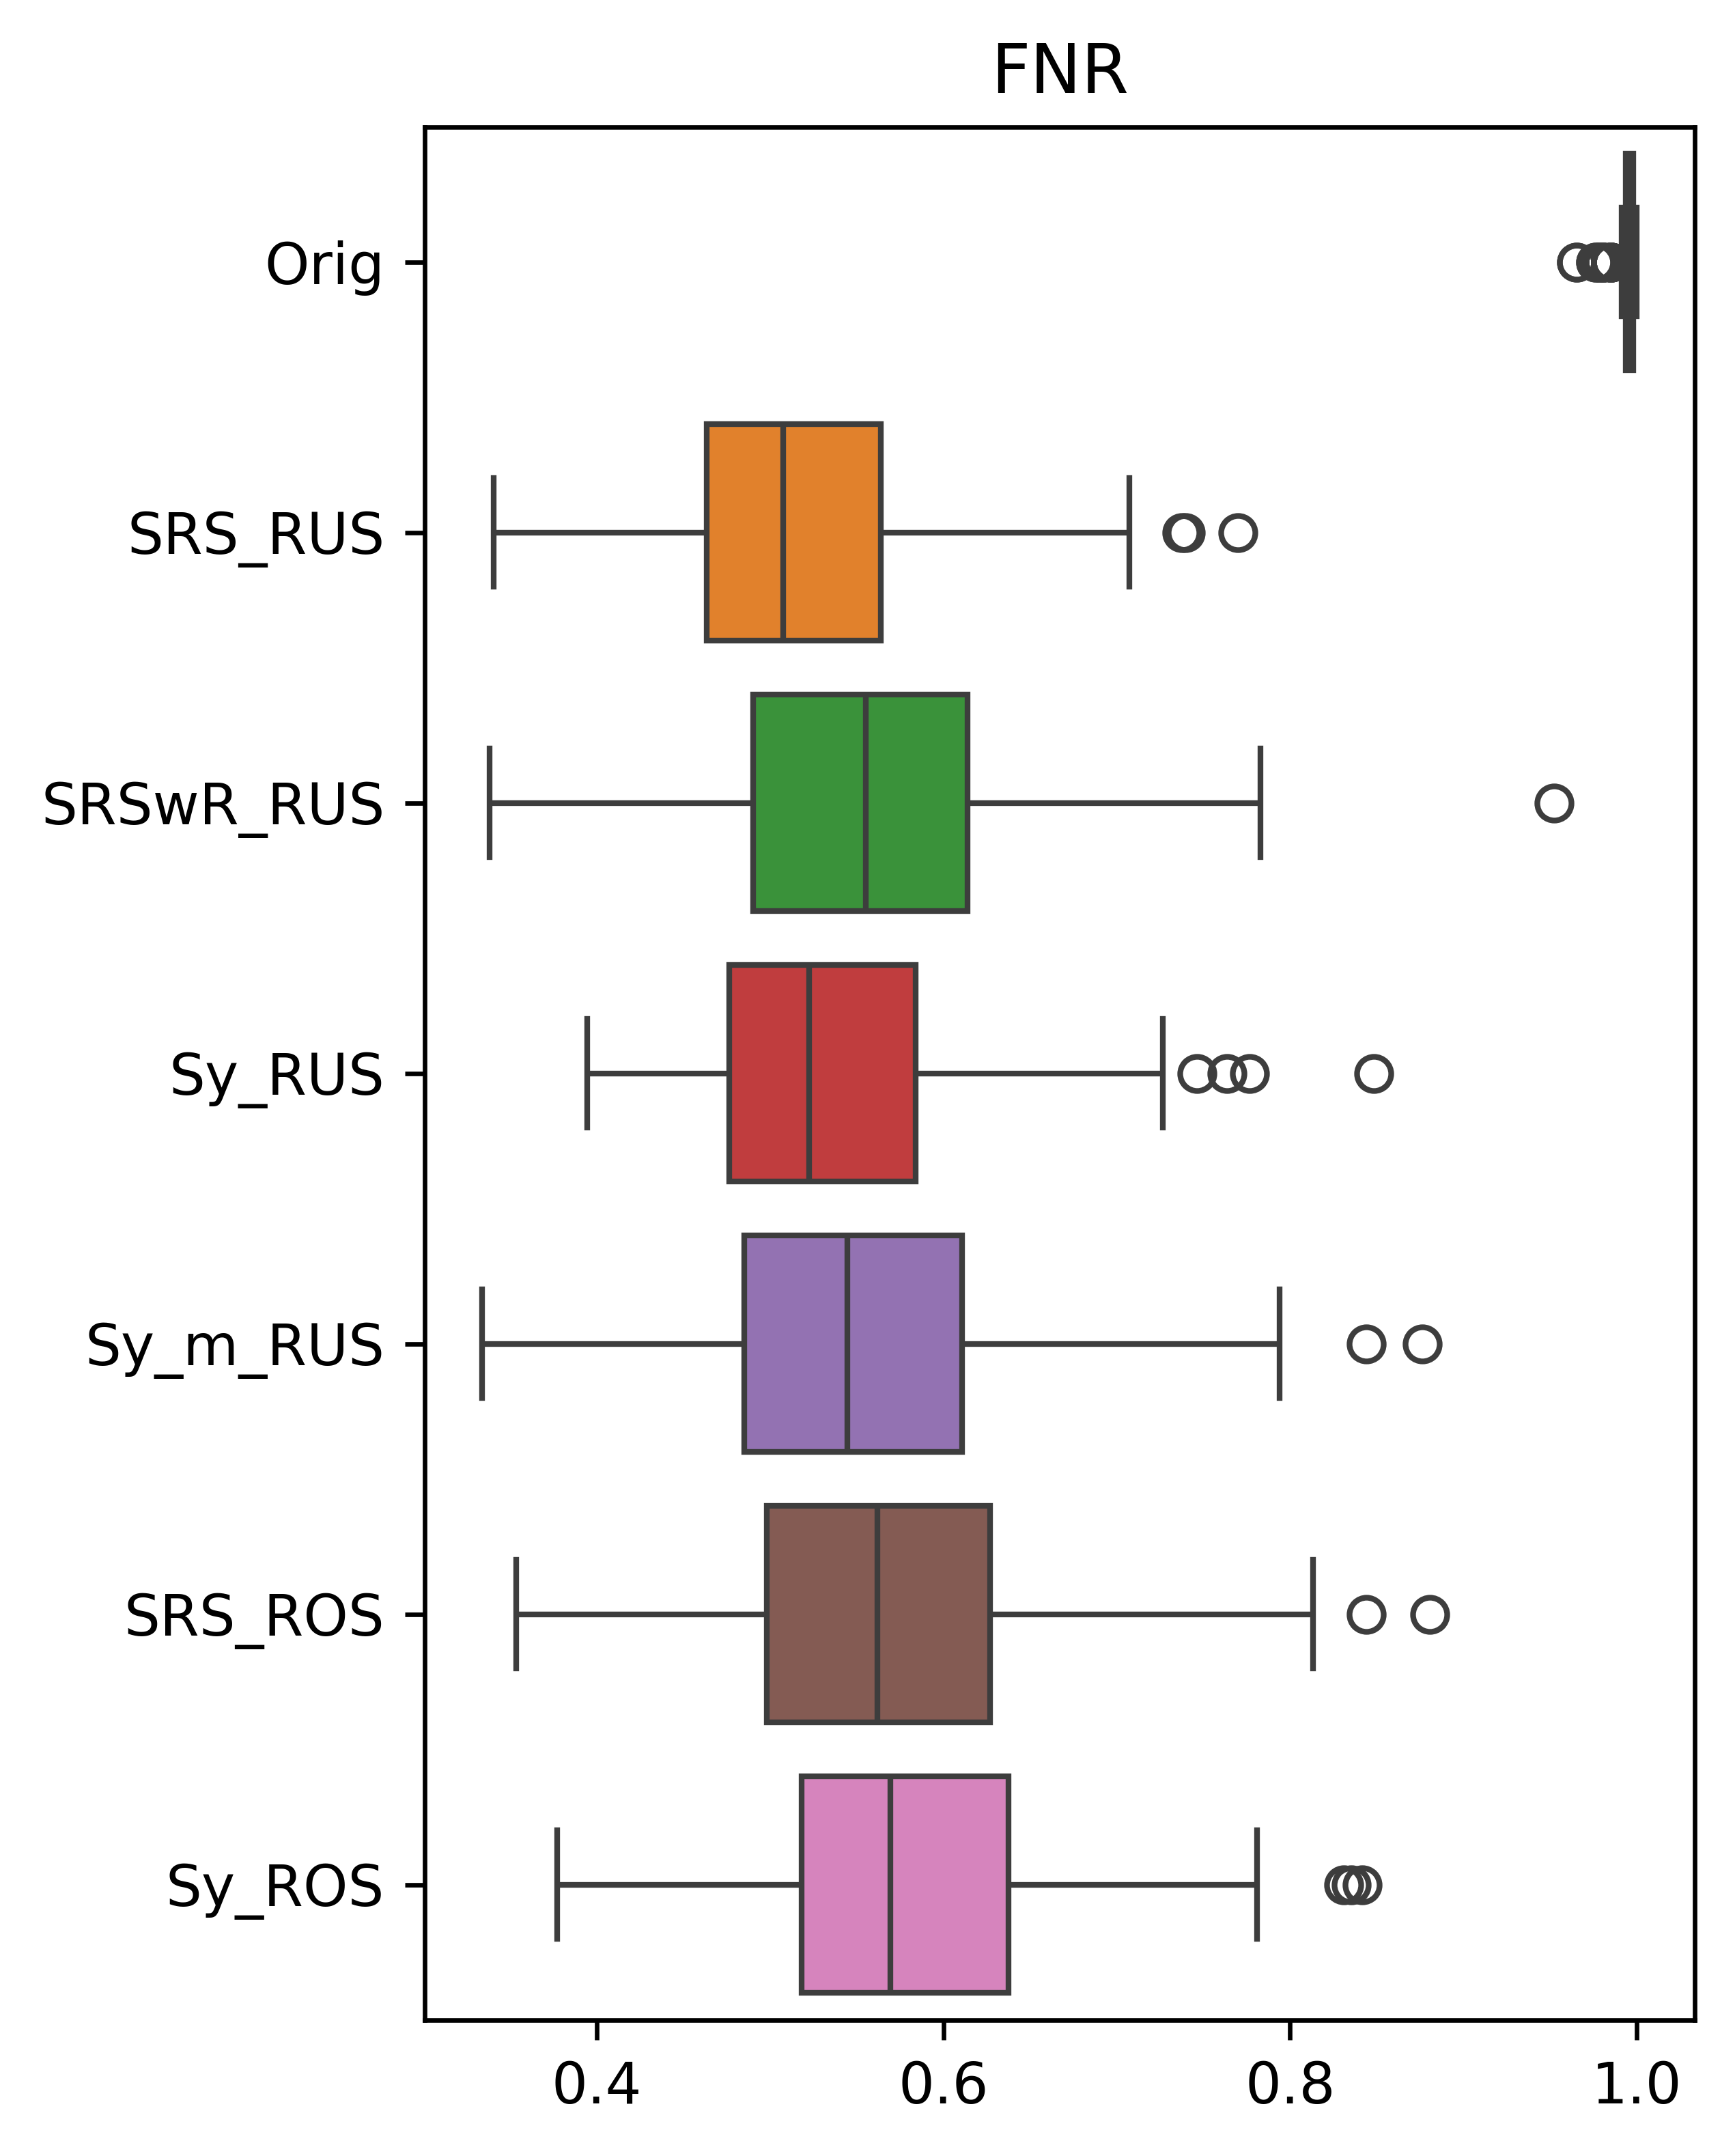

In [107]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [20]:
data_orig = pd.read_csv(path_to_data2 + "Diabetes_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2 + "Diabetes_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2 + "Diabetes_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2 + "Diabetes_Sy_RUS.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2 + "Diabetes_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2 + "Diabetes_SRS_ROS_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2 + "Diabetes_Sy_ROS_Extension.csv", sep=",", header=0)
data_SRS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,38.182653,0.620355,0.379645,0.073171,0.926829,0.392217
1,1,39.117342,0.605290,0.394710,0.072358,0.927642,0.398235
2,2,33.653508,0.620690,0.379310,0.069106,0.930894,0.396149
3,3,31.903510,0.548042,0.451958,0.104878,0.895122,0.321974
4,4,50.133427,0.621694,0.378306,0.071545,0.928455,0.394950
...,...,...,...,...,...,...,...
65,65,50.390452,0.645129,0.354871,0.059350,0.940650,0.407651
66,66,53.315144,0.572481,0.427519,0.091057,0.908943,0.348805
67,67,48.622430,0.620020,0.379980,0.078862,0.921138,0.411389
68,68,45.796219,0.568463,0.431537,0.092683,0.907317,0.329012


Original (imbalanced) dataset:

In [21]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 70
SRSwR RUS 70
Sy RUS 70
Sym RUS 70
SRS ROS 70
Sy ROS 70


Error type: FPR
Mean: 0.056431201880000004
Variance: 0.0003086563460579054
Variance of estimate: 6.173126921158108e-06
Standard error: 0.0024845778154765265
95% Confidence Interval:  [ 0.05156142936166601 ,  0.061300974398334 ]
-----------------------------
Error type: FNR
Mean: 0.7798211382400001
Variance: 0.0030638735413488403
Variance of estimate: 6.12774708269768e-05
Standard error: 0.007827992771264981
95% Confidence Interval:  [ 0.7644782724083208 ,  0.7951640040716794 ]
-----------------------------
Error type: Source time
Mean: 159.317669926
Variance: 307.5208710074591
Variance of estimate: 6.150417420149182
Standard error: 2.480003512124364
95% Confidence Interval:  [ 154.45686304223625 ,  164.17847680976377 ]
-----------------------------


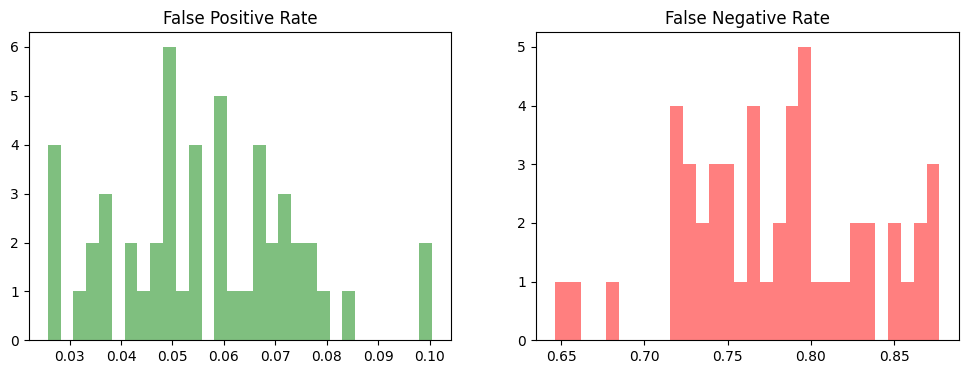

In [56]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']
orig_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

In [59]:
data_SRS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,38.182653,0.620355,0.379645,0.073171,0.926829,0.392217
1,1,39.117342,0.605290,0.394710,0.072358,0.927642,0.398235
2,2,33.653508,0.620690,0.379310,0.069106,0.930894,0.396149
3,3,31.903510,0.548042,0.451958,0.104878,0.895122,0.321974
4,4,50.133427,0.621694,0.378306,0.071545,0.928455,0.394950
...,...,...,...,...,...,...,...
65,65,50.390452,0.645129,0.354871,0.059350,0.940650,0.407651
66,66,53.315144,0.572481,0.427519,0.091057,0.908943,0.348805
67,67,48.622430,0.620020,0.379980,0.078862,0.921138,0.411389
68,68,45.796219,0.568463,0.431537,0.092683,0.907317,0.329012


Error type: FPR
Mean: 0.6194031277999998
Variance: 0.0018574791678661036
Variance of estimate: 2.653541668380148e-05
Standard error: 0.0051512538943252915
95% Confidence Interval:  [ 0.6093066701671223 ,  0.6294995854328774 ]
-----------------------------
Error type: FNR
Mean: 0.07498257845714287
Variance: 0.0003162210119446578
Variance of estimate: 4.517443027780826e-06
Standard error: 0.002125427728195157
95% Confidence Interval:  [ 0.07081674010988037 ,  0.07914841680440537 ]
-----------------------------
Error type: Source time
Mean: 42.97201582171428
Variance: 63.13419901209541
Variance of estimate: 0.9019171287442201
Standard error: 0.9496931761070099
95% Confidence Interval:  [ 41.11061719654454 ,  44.83341444688402 ]
-----------------------------


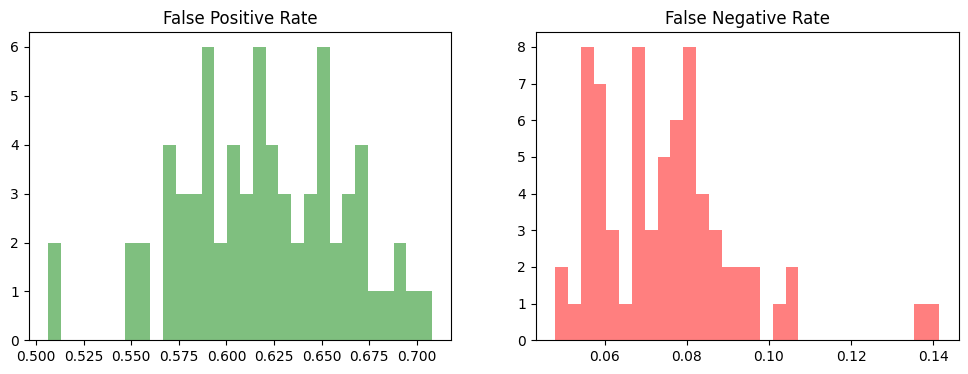

In [63]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.6248457601428572
Variance: 0.0017181481840738253
Variance of estimate: 2.4544974058197505e-05
Standard error: 0.004954288451250846
95% Confidence Interval:  [ 0.6151353547784055 ,  0.6345561655073089 ]
-----------------------------
Error type: FNR
Mean: 0.0732288037
Variance: 0.00028913319178511325
Variance of estimate: 4.130474168358761e-06
Standard error: 0.002032356801439836
95% Confidence Interval:  [ 0.06924538436917792 ,  0.07721222303082208 ]
-----------------------------
Error type: Source time
Mean: 45.01086710671429
Variance: 22.724342551462428
Variance of estimate: 0.3246334650208918
Standard error: 0.5697661494164881
95% Confidence Interval:  [ 43.89412545385797 ,  46.127608759570606 ]
-----------------------------


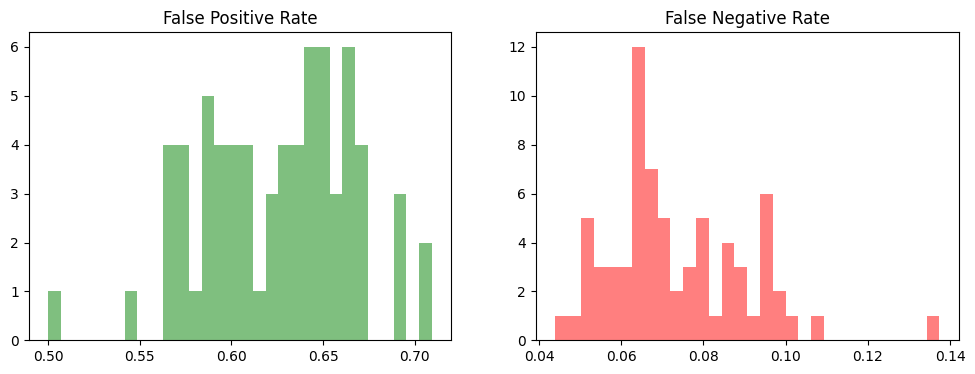

In [64]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.6338227557571428
Variance: 0.0013414888764044597
Variance of estimate: 1.9164126805777997e-05
Standard error: 0.004377685096689573
95% Confidence Interval:  [ 0.6252424929676312 ,  0.6424030185466543 ]
-----------------------------
Error type: FNR
Mean: 0.06927990711428571
Variance: 0.00019135708954984374
Variance of estimate: 2.7336727078549107e-06
Standard error: 0.0016533822025940979
95% Confidence Interval:  [ 0.06603927799720127 ,  0.07252053623137014 ]
-----------------------------
Error type: Source time
Mean: 50.56252305785714
Variance: 25.09248868041457
Variance of estimate: 0.3584641240059224
Standard error: 0.5987187353055877
95% Confidence Interval:  [ 49.38903433665819 ,  51.73601177905609 ]
-----------------------------


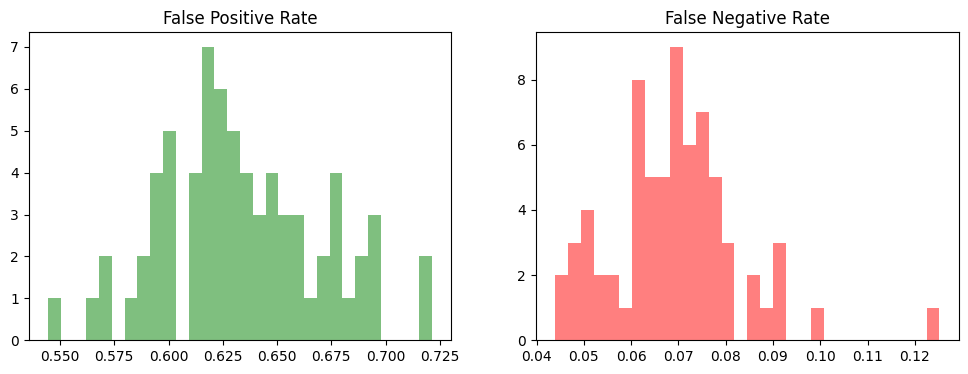

In [65]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

Error type: FPR
Mean: 0.6295566502142858
Variance: 0.0015424752066761475
Variance of estimate: 2.2035360095373534e-05
Standard error: 0.004694183645254362
95% Confidence Interval:  [ 0.6203560502695872 ,  0.6387572501589843 ]
-----------------------------
Error type: FNR
Mean: 0.07197444835714285
Variance: 0.00025498052794556213
Variance of estimate: 3.6425789706508875e-06
Standard error: 0.0019085541571176039
95% Confidence Interval:  [ 0.06823368220919235 ,  0.07571521450509336 ]
-----------------------------
Error type: Source time
Mean: 44.75912315342857
Variance: 27.342914779225435
Variance of estimate: 0.3906130682746491
Standard error: 0.6249904545468268
95% Confidence Interval:  [ 43.53414186251679 ,  45.984104444340346 ]
-----------------------------


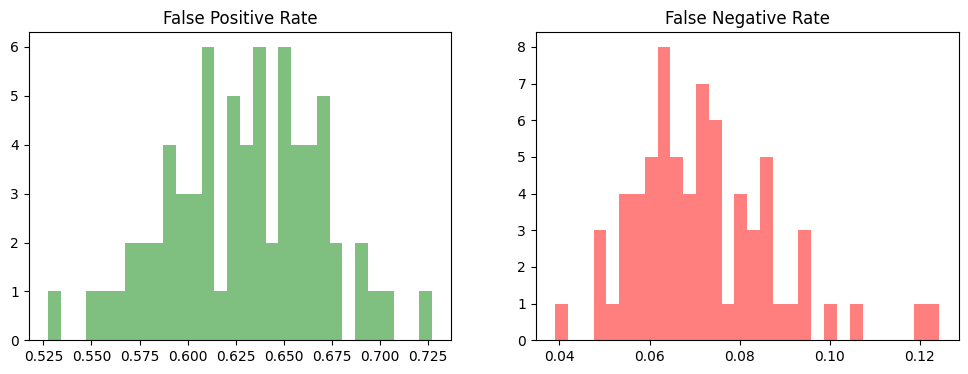

In [66]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.6211344396948444
Variance: 0.0008937507046104202
Variance of estimate: 1.2767867208720289e-05
Standard error: 0.0035732152480252694
95% Confidence Interval:  [ 0.6141309378087149 ,  0.6281379415809739 ]
-----------------------------
Error type: FNR
Mean: 0.0745876887390244
Variance: 0.0001480539958384233
Variance of estimate: 2.115057083406047e-06
Standard error: 0.0014543235827717458
95% Confidence Interval:  [ 0.07173721451679177 ,  0.07743816296125702 ]
-----------------------------
Error type: Source time
Mean: 248.26191054511426
Variance: 1652.0497579113576
Variance of estimate: 23.600710827305107
Standard error: 4.858056280788142
95% Confidence Interval:  [ 238.7401202347695 ,  257.783700855459 ]
-----------------------------


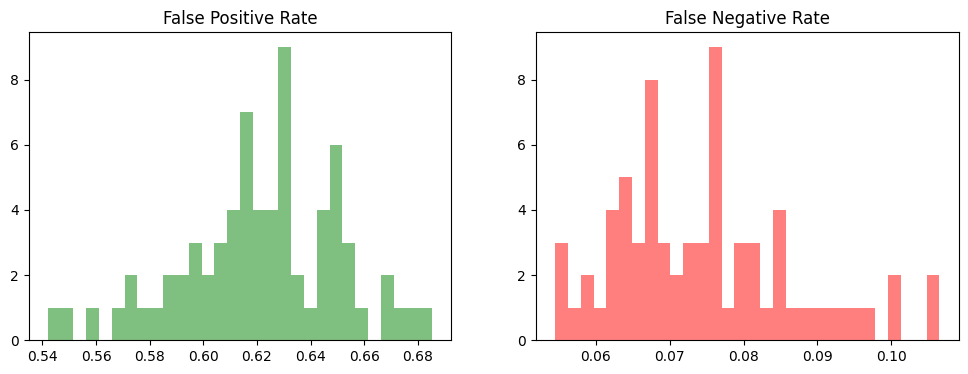

In [67]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

Error type: FPR
Mean: 0.6184226888637189
Variance: 0.0008890382946697196
Variance of estimate: 1.270054706671028e-05
Standard error: 0.003563782690724882
95% Confidence Interval:  [ 0.6114376747898981 ,  0.6254077029375397 ]
-----------------------------
Error type: FNR
Mean: 0.07566782813159117
Variance: 0.0001657690059095505
Variance of estimate: 2.3681286558507215e-06
Standard error: 0.001538872527485861
95% Confidence Interval:  [ 0.07265163797771888 ,  0.07868401828546347 ]
-----------------------------
Error type: Source time
Mean: 253.82050629649999
Variance: 4444.262720974389
Variance of estimate: 63.48946744249127
Standard error: 7.968027826412961
95% Confidence Interval:  [ 238.20317175673057 ,  269.4378408362694 ]
-----------------------------


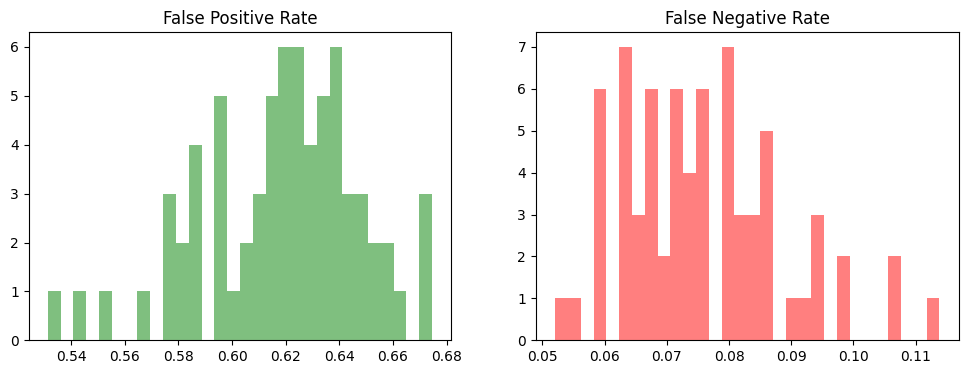

In [69]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [71]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['Orig'] = pd.Series(orig_FPR)
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

In [72]:
DF

,SRS_RUS,Orig,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS
0,0.620355,0.050552,0.586542,0.660194,0.614664,0.631403,0.607968
1,0.605290,0.058922,0.672581,0.586876,0.578507,0.615668,0.568129
2,0.620690,0.034818,0.608972,0.628055,0.625377,0.613324,0.595246
3,0.548042,0.053565,0.570137,0.624372,0.676933,0.647807,0.585537
4,0.621694,0.061600,0.709407,0.585537,0.661199,0.638098,0.630398
...,...,...,...,...,...,...,...
65,0.645129,NaN,0.591563,0.657516,0.647472,0.625042,0.620020
66,0.572481,NaN,0.564446,0.676599,0.662538,0.611985,0.625711
67,0.620020,NaN,0.636759,0.565785,0.613659,0.622364,0.632072
68,0.568463,NaN,0.615333,0.670907,0.552394,0.628055,0.651155


<Axes: title={'center': 'FPR'}>

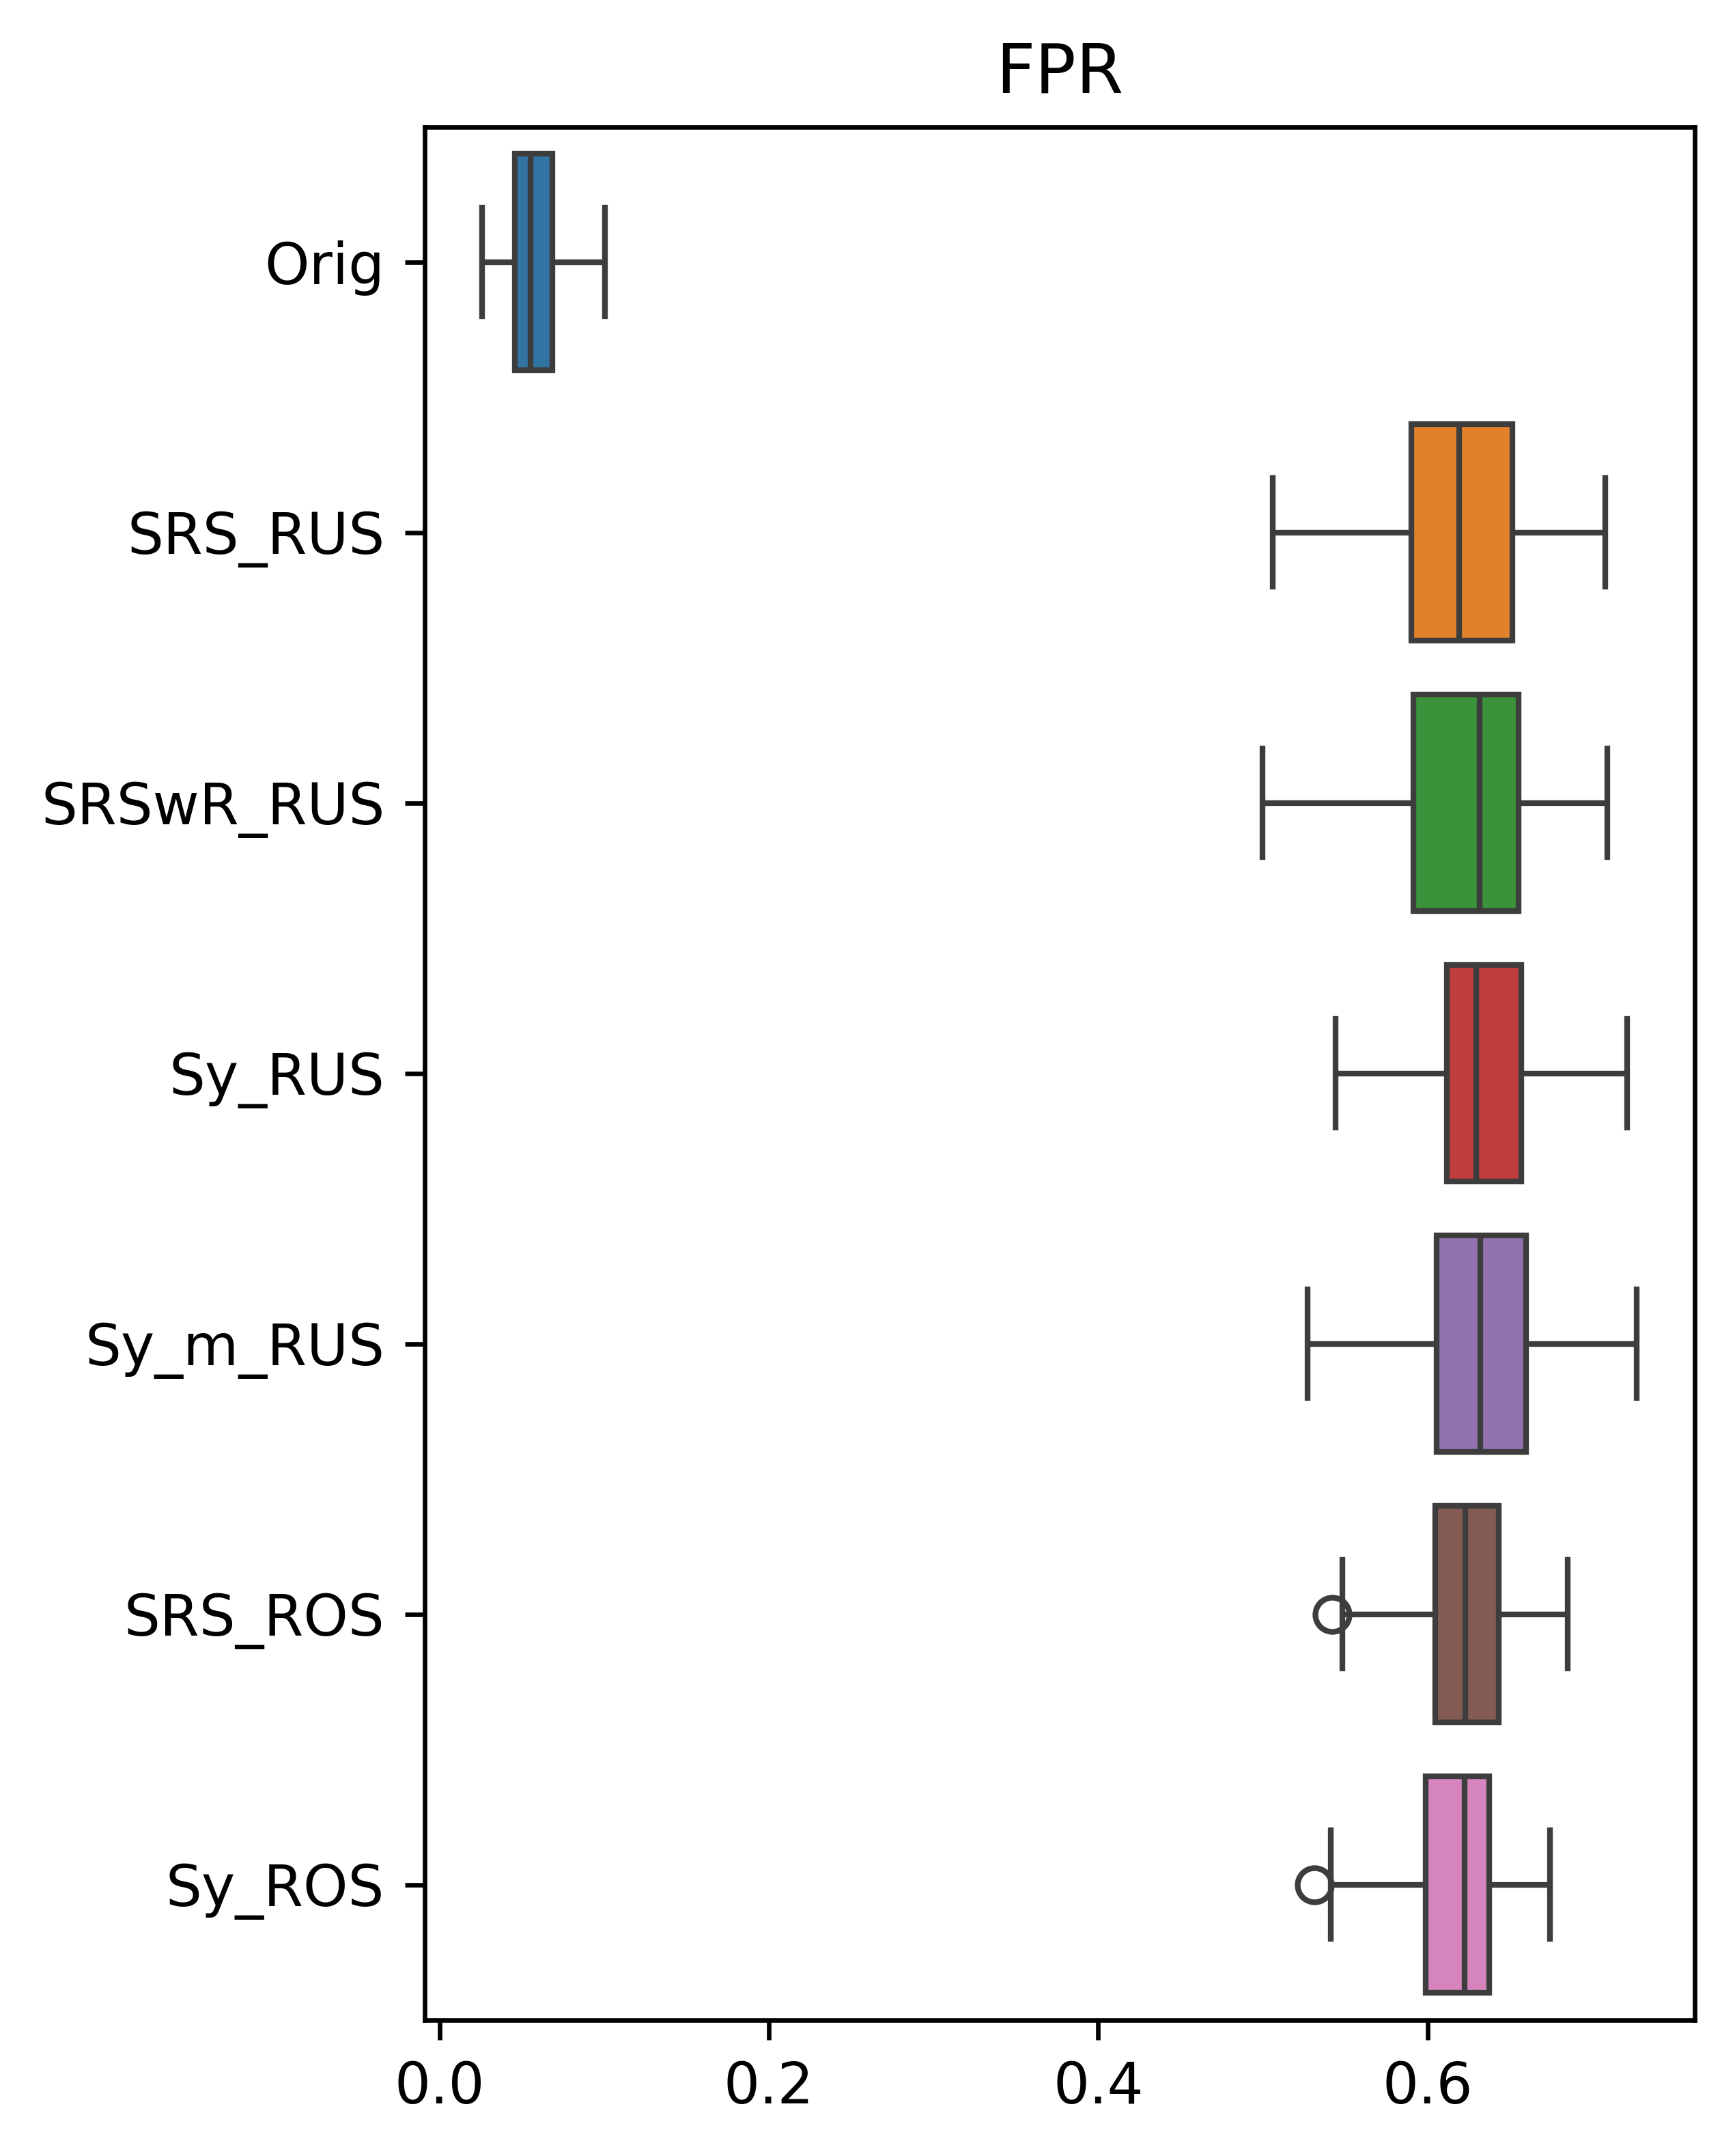

In [73]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [80]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['Orig'] = pd.Series(orig_FNR)
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF

,SRS_RUS,Orig,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS
0,0.073171,0.786179,0.084553,0.060163,0.074797,0.067480,0.075610
1,0.072358,0.772358,0.053659,0.091870,0.089431,0.078862,0.098374
2,0.069106,0.853659,0.075610,0.073171,0.066667,0.075610,0.084553
3,0.104878,0.791870,0.097561,0.070732,0.060163,0.056911,0.094309
4,0.071545,0.768293,0.043902,0.076423,0.057724,0.061789,0.072358
...,...,...,...,...,...,...,...
65,0.059350,NaN,0.087805,0.064228,0.064228,0.073984,0.079675
66,0.091057,NaN,0.100000,0.051220,0.060163,0.079675,0.080488
67,0.078862,NaN,0.066667,0.091870,0.071545,0.071545,0.068293
68,0.092683,NaN,0.076423,0.055285,0.104878,0.069919,0.064228


<Axes: title={'center': 'FNR'}>

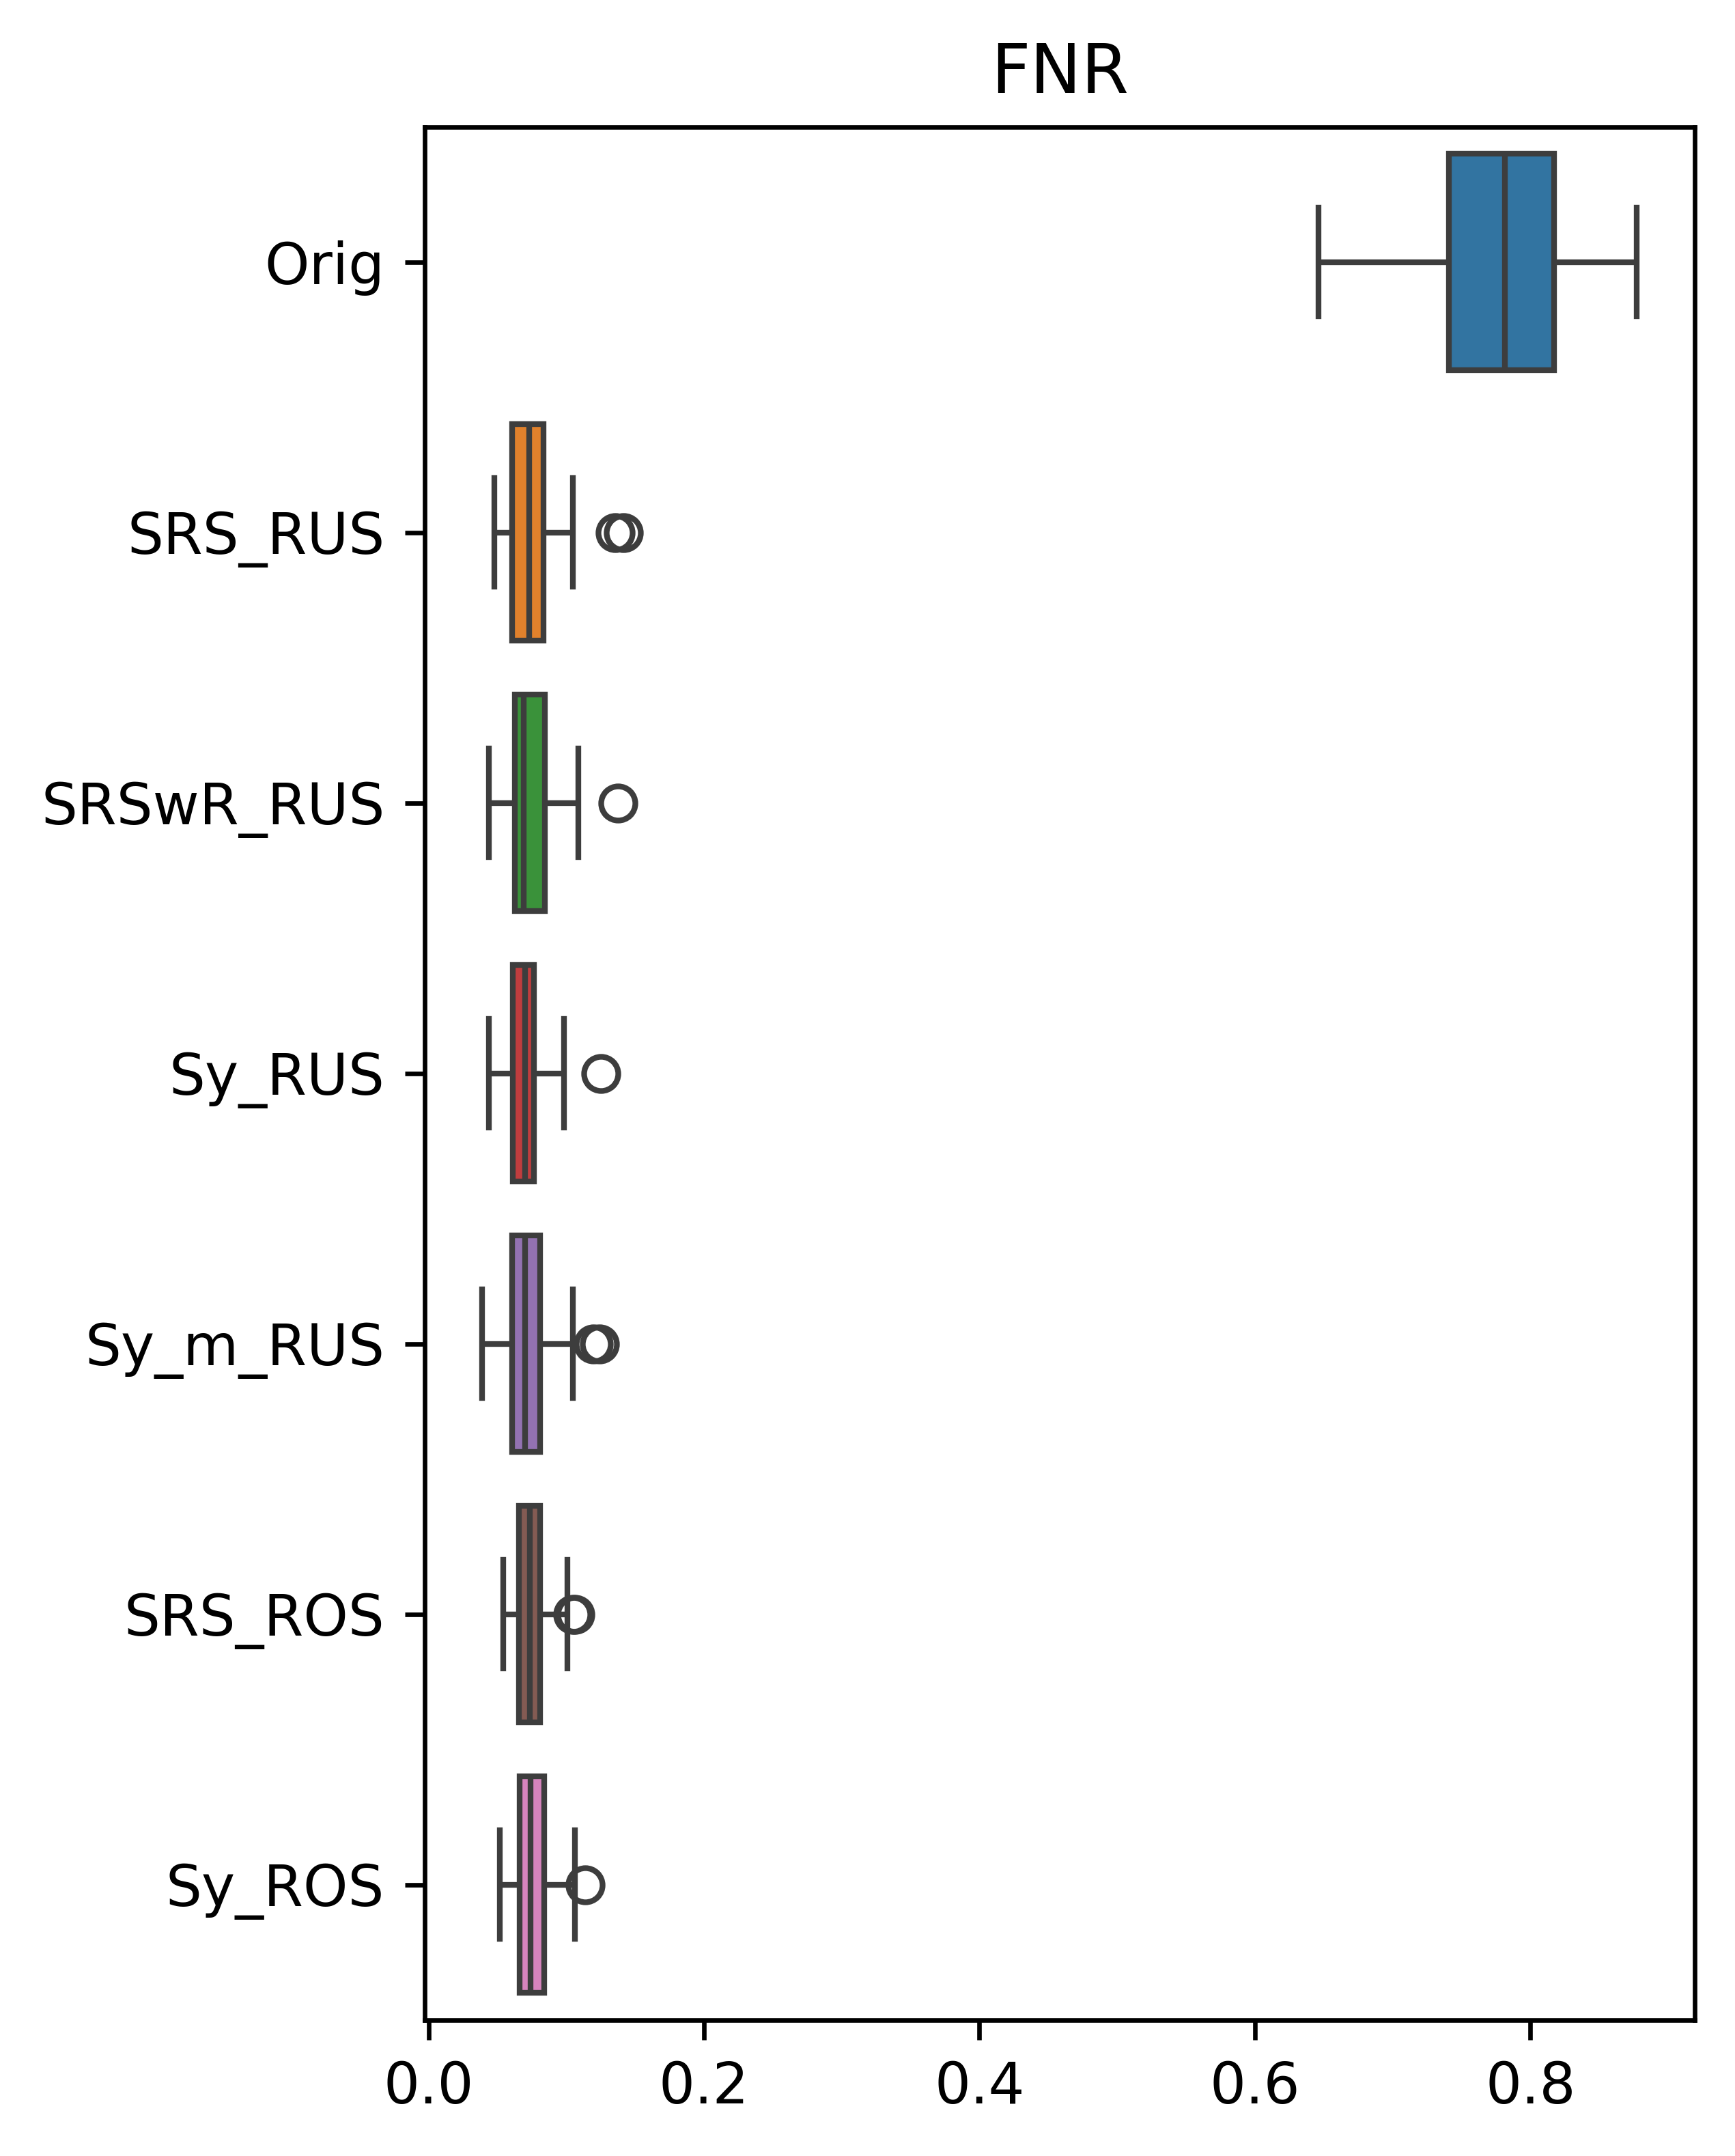

In [81]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [83]:
Time = pd.DataFrame()

DF = Time

DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = pd.Series(orig_time)
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,38.182653,44.710603,54.704627,50.085175,267.726472,209.656935,154.021988
1,39.117342,40.691376,51.964416,47.956052,207.150869,221.518013,145.401370
2,33.653508,45.419588,52.233519,46.123318,222.592849,255.109118,131.922879
3,31.903510,38.715209,51.133327,38.541672,225.200115,213.152850,132.337104
4,50.133427,38.072016,47.998141,50.905257,224.320434,268.187793,171.298459
...,...,...,...,...,...,...,...
65,50.390452,56.401693,62.424274,36.940017,297.775242,352.601581,NaN
66,53.315144,50.392574,50.114683,46.524465,271.810107,384.785461,NaN
67,48.622430,51.584819,47.325897,42.483769,240.773104,375.437190,NaN
68,45.796219,44.942038,48.165862,44.660008,280.672756,332.529480,NaN


<Axes: title={'center': 'Training Time'}>

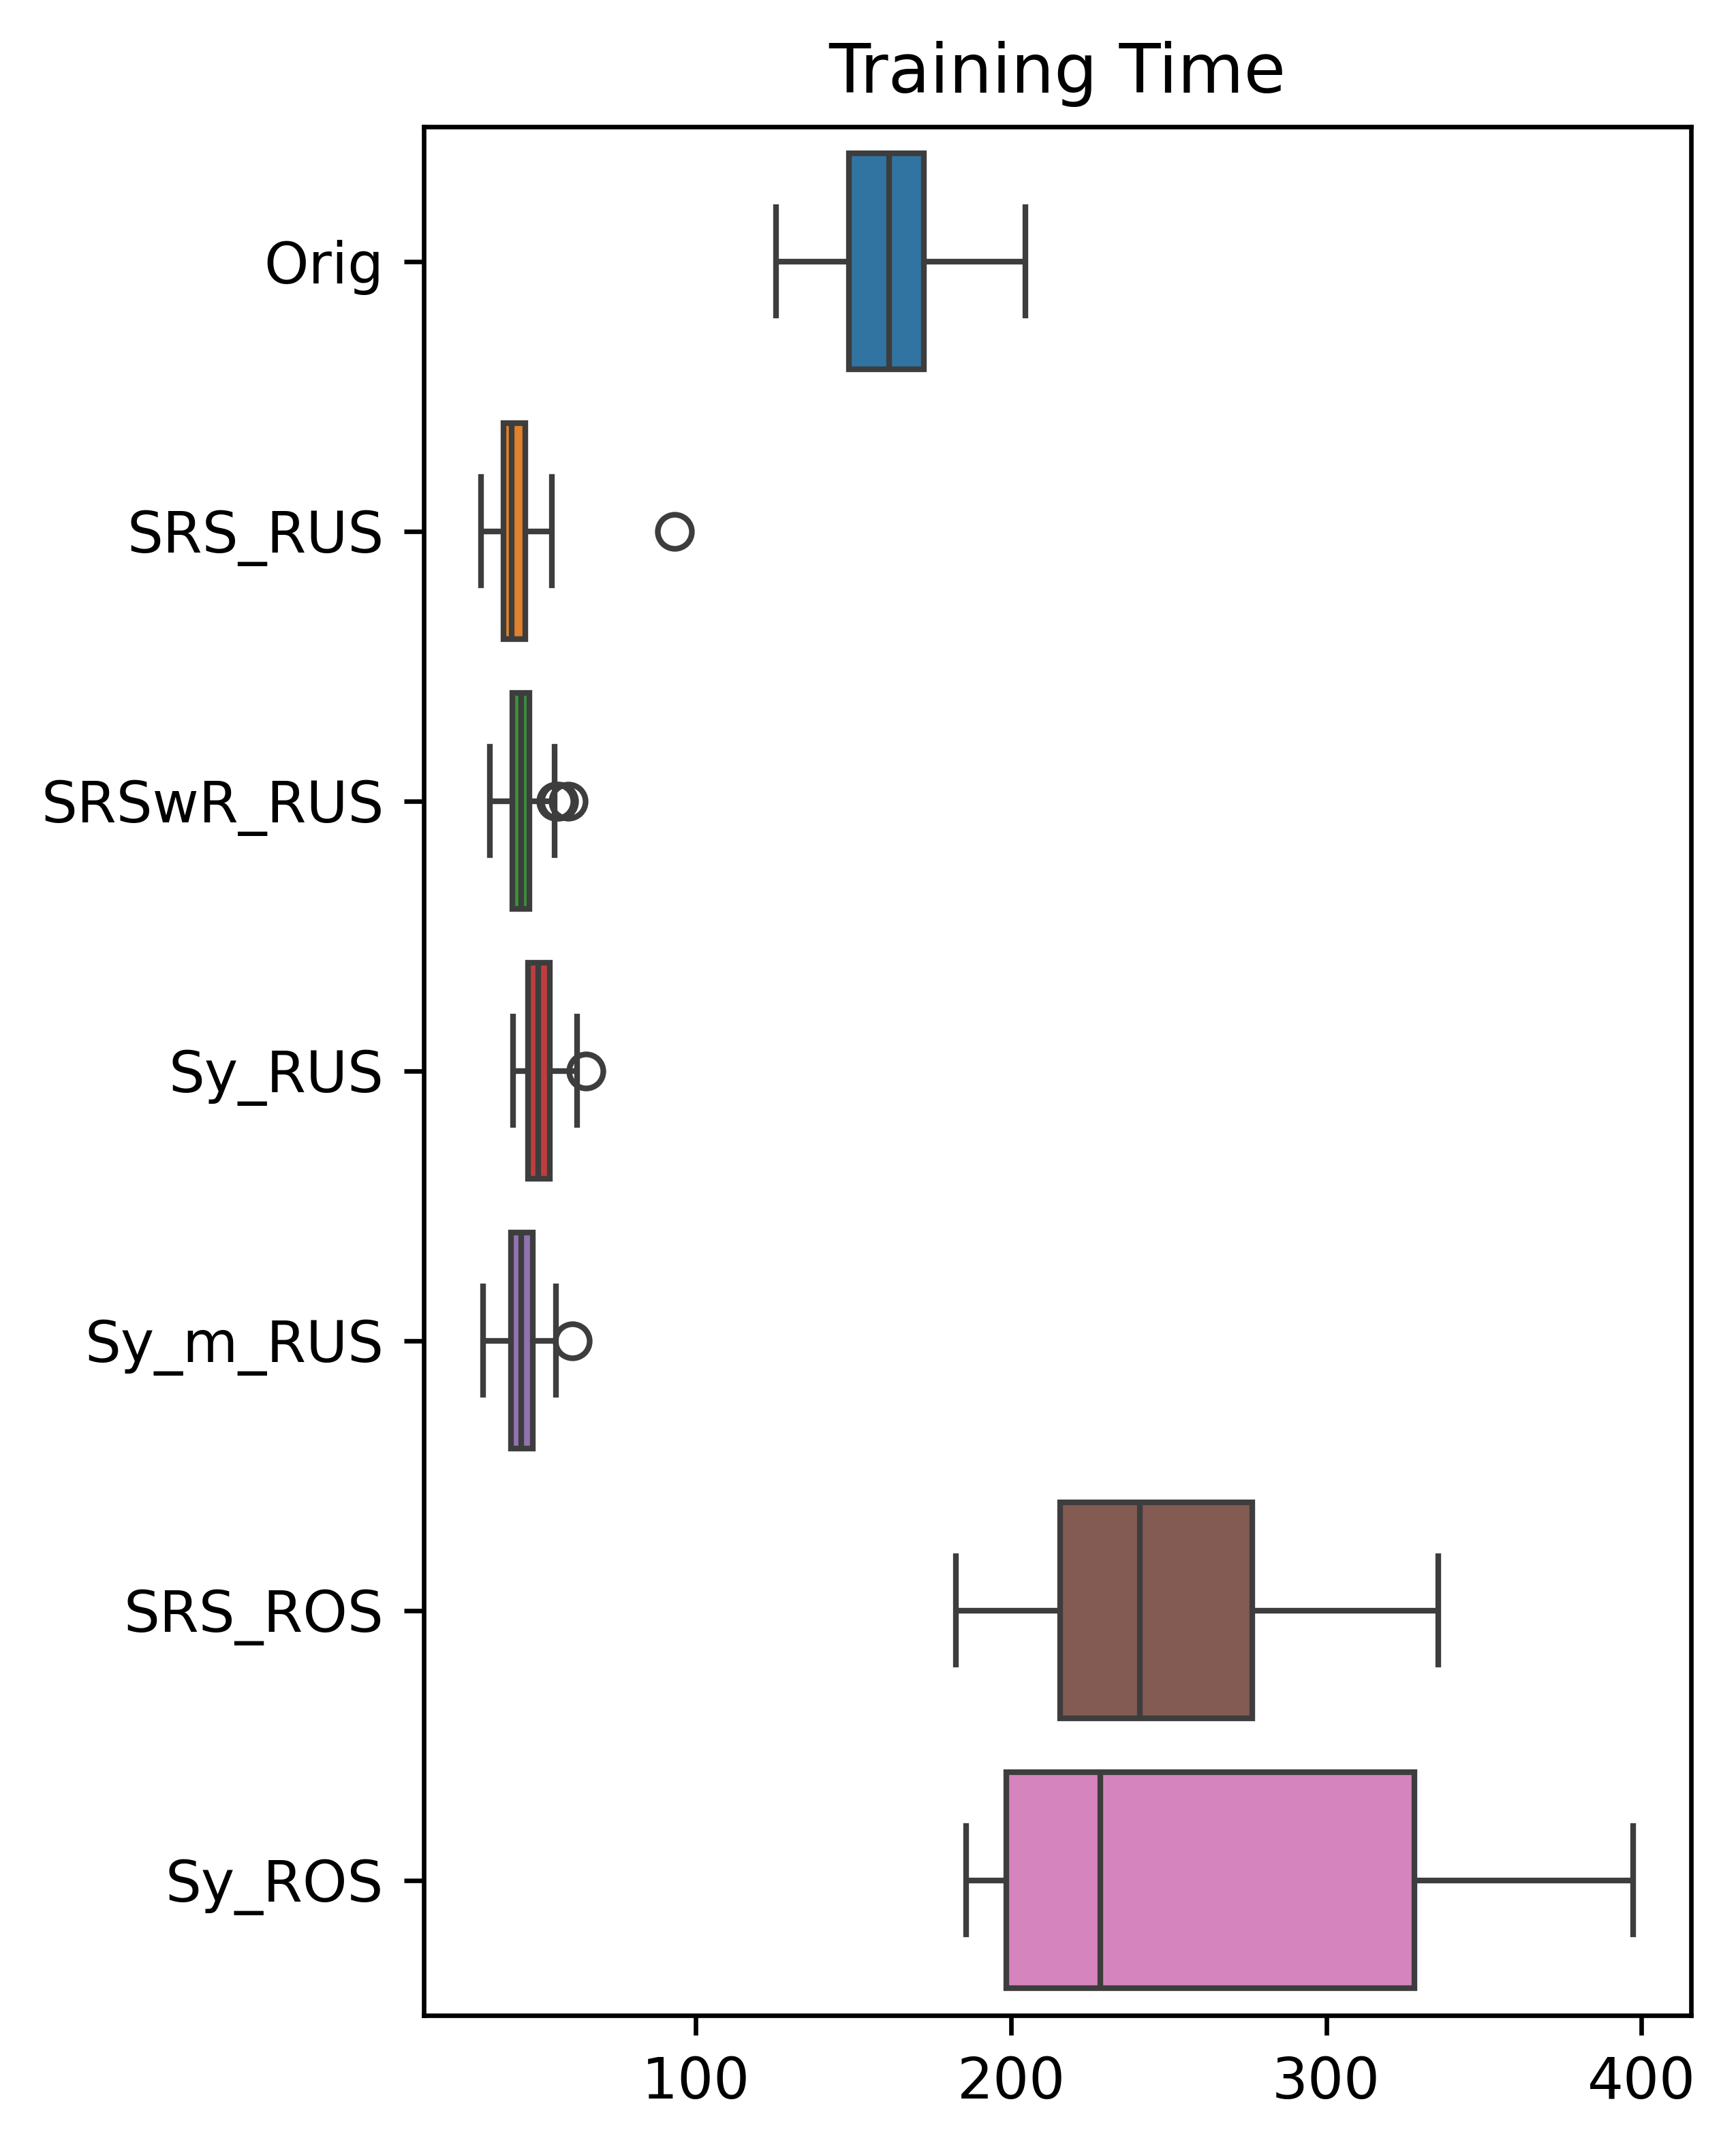

In [85]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')